In [76]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
import numpy as np
from selenium import webdriver

In [77]:
def PosterToArray(image):
    poster = np.array(image)
    poster = poster.astype('float32') / 255
    return poster

In [78]:
def modelInit():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=["accuracy"])
    return model

In [79]:
def PredictByModel(ourGenre, posterArray, model):
    checkpoint_path = f"Weights/{ourGenre}/cp.ckpt"
    model.load_weights(checkpoint_path).expect_partial()
    predicted = model.predict(posterArray)
    return (predicted[0], ourGenre)
    
    

In [80]:
def PredictAllModes(posterPath, model):
    poster = Image.open(posterPath)
    poster = poster.resize((100,100))
    numPyPoster = PosterToArray(poster)
    posterArray = [numPyPoster]
    posterArray = np.array(posterArray) 
    
    for i in range(len(Genres)):
        allPredictions.append(PredictByModel(Genres[i], posterArray, model))


In [81]:
def ThreeGenres():
    tempSort = []
    
    for i in range(len(allPredictions)):
        temp = [allPredictions[i][0][1] , allPredictions[i][1]]
        tempSort.append(temp)
    tempSort.sort()
    tempSort.reverse()
    print(f"Genre1: {tempSort[0][1]} ({np.round((tempSort[0][0] * 100),2)}%)    Genre2: {tempSort[1][1]} ({np.round(tempSort[1][0] * 100,2)}%)    Genre3: {tempSort[2][1]}({np.round(tempSort[2][0] * 100,2)}%)")
    recommendedGenres.append(tempSort[0][1])
    recommendedGenres.append(tempSort[1][1])
    recommendedGenres.append(tempSort[2][1])
    

In [82]:
Genres = ['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']
posterPath = "TestImages/test4.jpg"
recommendedGenres = []
allPredictions = []
model = modelInit()
PredictAllModes(posterPath, model)
ThreeGenres()

Genre1: Thriller (99.83%)    Genre2: Drama (99.27%)    Genre3: Crime(98.13%)


In [83]:
# for debugging
# allPredictions
# recommendedGenres

In [86]:
URLrecommend = f"https://www.imdb.com/search/title/?genres={recommendedGenres[0]},{recommendedGenres[1]},{recommendedGenres[2]}&explore=title_type,genres"
chromeDriverPATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(chromeDriverPATH)
driver.get(URLrecommend)
# driver.save_screenshot('image.png')
S = lambda X: driver.execute_script('return document.body.parentNode.scroll'+X)
driver.set_window_size(S('Width'),S('Height')) # May need manual adjustment                                                                                                                
driver.find_element_by_tag_name('body').screenshot('recommendedMovies.png')
driver.quit()

C:\Users\amrme\AppData\Local\Temp/ipykernel_18180/3072469346.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chromeDriverPATH)
C:\Users\amrme\AppData\Local\Temp/ipykernel_18180/3072469346.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_tag_name('body').screenshot('recommendedMovies.png')


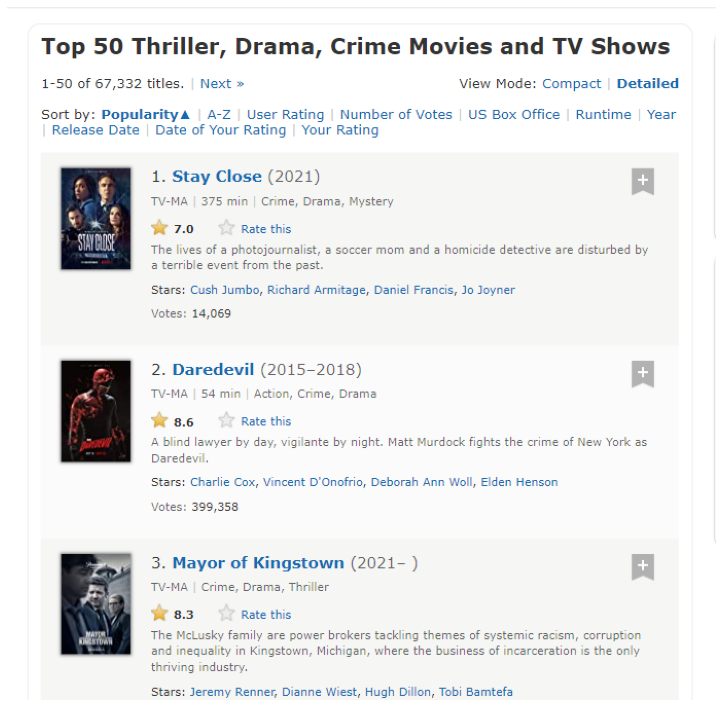

In [87]:
im = Image.open("recommendedMovies.png")
width, height = im.size # Size of the image in pixels (size of original image)
im = im.crop((0, 60, width - 300, height))
plt.figure(figsize=(100, 20))
plt.subplot(2, 10, 1)
plt.imshow(im)
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.show()